## Altair

* Altair is an open source declarative statistical visualization library for Python, based on Vega and Vega-Lite
* Vega is a visualization grammar (think Grammar of Graphics) that can be written as a JSON specification. Vega-lite provides most of the functionality of Vega more concisely, by relying on smart defaults and simpler encodings.

#### Features of Altair:
* Simple, friendly and consistent API.
* Built on top of the powerful Vega-Lite JSON specification.
* Compound plot types that can be used to create stacked, layered, faceted, and repeated charts.
    * Layered charts – allows you to overlay two different charts on the same set of axes. They can be useful, for example, when you wish to draw multiple marks for the same data.
    * Horizontal Concatenation – display two plots side-by-side.
    * Vertical Concatenation – offers vertical concatenation via the vconcat() function or the & operator.
    * Repeated Charts – provides a convenient interface for a particular type of horizontal or vertical concatenation, in which the only difference between the concatenated panels is modification of one or more encodings.
    * Faceted Charts – provide a more convenient API for creating multiple views of a dataset for a specific type of chart: one where each panel contains a different subset of data.
    * Compound Charts and Data Specification – specify data in multiple places.
* Renderers for JupyterLab, nteract, Jupyter Notebook, and Google Colab.
* Customize renderers by allowing users to define and enable new MIME types.
* Data Transformations:
    * Before the chart definition, using standard Pandas data transformations.
    * Within the chart definition, using Vega-Lite’s data transformation tools.
* Save charts in a variety of formats: PNG, SVG, JSON, and HTML.
* Support for JupyterLab/nteract through MIME based rendering.

* Declarative means you only have to declare links between data columns to the encoding channels. All the plot details are handled automatically.

#### Installing Altair

In [1]:
!pip install -U altair

     |████████████████████████████████| 604kB 1.8MB/s eta 0:00:01


To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.<br><br>
* To install the notebook and Altair with conda, run the following command:
    * <b>$ conda install -c conda-forge altair vega_datasets notebook vega</b><br><br>

* To install the notebook and Altair with pip, run the following command:
    * <b>pip install -U altair vega_datasets notebook vega</b>

#### Installation of Vega datasets

In [2]:
!pip install -U altair vega_datasets notebook vega

Requirement already up-to-date: altair in /anaconda3/lib/python3.7/site-packages (3.2.0)
     |████████████████████████████████| 215kB 2.6MB/s eta 0:00:01
Requirement already up-to-date: notebook in /anaconda3/lib/python3.7/site-packages (6.0.1)
     |████████████████████████████████| 2.2MB 13.9MB/s eta 0:00:01


In [3]:
import pandas as pd
import altair as alt

import vega
from vega_datasets import data

#### Version of Altair

In [4]:
alt.__version__

'3.2.0'

#### Version of vega

In [5]:
vega.__version__

'2.6.0'

#### Enabling Notebook<br>
In order to turn your altair chart from the JSON structure output by Altair into a rendered visualization requires a front-end that knows how to interpret Vega and Vega-Lite specifications<br>
https://altair-viz.github.io/user_guide/renderers.html

In [6]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Datasets from vega

In [11]:
print(data.list_datasets())

['7zip', 'airports', 'anscombe', 'barley', 'birdstrikes', 'budget', 'budgets', 'burtin', 'cars', 'climate', 'co2-concentration', 'countries', 'crimea', 'disasters', 'driving', 'earthquakes', 'ffox', 'flare', 'flare-dependencies', 'flights-10k', 'flights-200k', 'flights-20k', 'flights-2k', 'flights-3m', 'flights-5k', 'flights-airport', 'gapminder', 'gapminder-health-income', 'gimp', 'github', 'graticule', 'income', 'iowa-electricity', 'iris', 'jobs', 'la-riots', 'londonBoroughs', 'londonCentroids', 'londonTubeLines', 'lookup_groups', 'lookup_people', 'miserables', 'monarchs', 'movies', 'normal-2d', 'obesity', 'points', 'population', 'population_engineers_hurricanes', 'seattle-temps', 'seattle-weather', 'sf-temps', 'sp500', 'stocks', 'udistrict', 'unemployment', 'unemployment-across-industries', 'us-10m', 'us-employment', 'us-state-capitals', 'weather', 'weball26', 'wheat', 'world-110m', 'zipcodes']


#### Import data from vega

* If you're curious about the source data, you can access the URL for any of the available datasets

In [8]:
data.unemployment_across_industries.url

'https://vega.github.io/vega-datasets/data/unemployment-across-industries.json'

#### Import the data directly without usings pandas dataframe

In [12]:
unemployment_data = data.unemployment_across_industries()

unemployment_data.head(5)

,series,year,month,count,rate,date
0,Government,2000,1,430,2.1,2000-01-01 08:00:00+00:00
1,Government,2000,2,409,2.0,2000-02-01 08:00:00+00:00
2,Government,2000,3,311,1.5,2000-03-01 08:00:00+00:00
3,Government,2000,4,269,1.3,2000-04-01 08:00:00+00:00
4,Government,2000,5,370,1.9,2000-05-01 07:00:00+00:00


#### Describe the data

In [13]:
unemployment_data.describe()

,year,month,count,rate
count,1708.000000,1708.000000,1708.000000,1708.000000
mean,2004.590164,6.418033,552.884660,5.673770
std,2.933865,3.483623,423.456201,3.158523
min,2000.000000,1.000000,2.000000,0.300000
25%,2002.000000,3.000000,233.000000,3.400000
50%,2005.000000,6.000000,447.000000,5.000000
75%,2007.000000,9.000000,820.250000,7.000000
max,2010.000000,12.000000,2440.000000,27.100000


In [18]:
## TODO: While recording - open up the option of menus on the interactive chart and click on each 
## and show what the result is

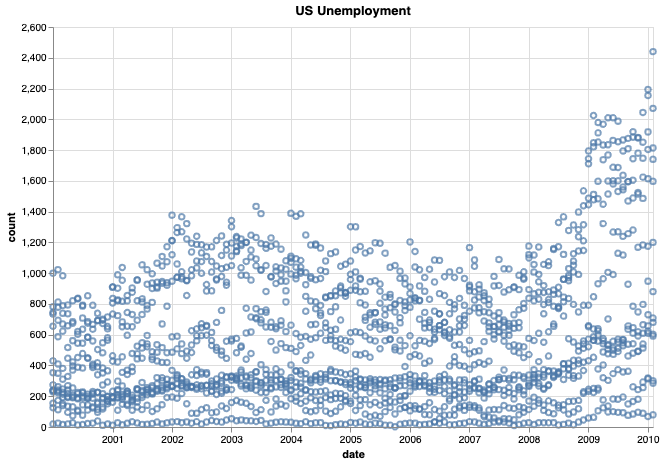

In [14]:
alt.Chart(unemployment_data, height=400, width=600) \
   .mark_point() \
   .encode(x='date', 
           y='count') \
   .properties(title='US Unemployment')

* From we can see the count of unemployment in each series

In [15]:
series_data = pd.DataFrame(unemployment_data.groupby('series', as_index=False)['count'].sum())

series_data.sort_values(by='count', ascending=False)

,series,count
13,Wholesale and Retail Trade,143662
8,Manufacturing,124575
7,Leisure and hospitality,121221
1,Business services,111062
2,Construction,105923
3,Education and Health,77277
5,Government,65733
4,Finance,40146
11,Self-employed,39301
10,Other,37963


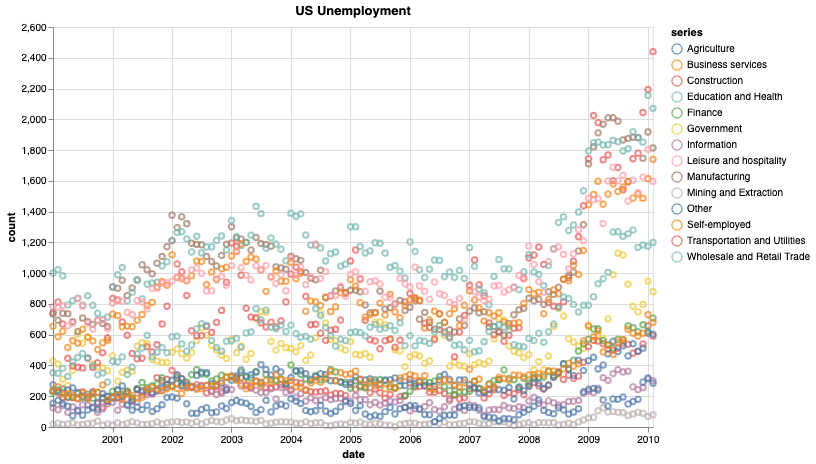

In [16]:
alt.Chart(unemployment_data, height=400, width=600) \
   .mark_point() \
   .encode(x='date', 
           y='count', 
           color='series') \
   .properties(title='US Unemployment')

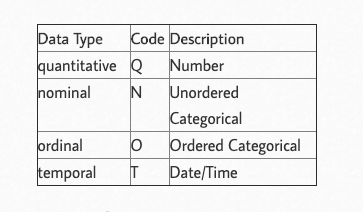

* Let's see according to the year what is the count distribution of unemployment

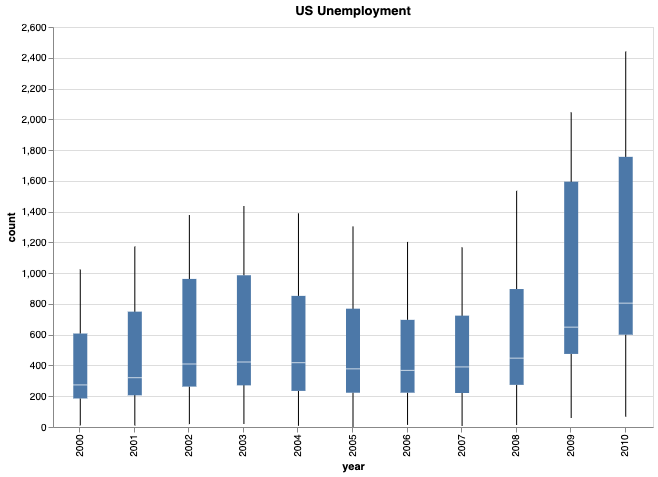

In [17]:
alt.Chart(unemployment_data, height=400, width=600) \
   .mark_boxplot(extent=500) \
   .encode(x='year:O', 
           y='count:Q') \
   .properties(title='US Unemployment')

* Finding the sum of count of unemployment according to the year

In [15]:
year_data = pd.DataFrame(unemployment_data.groupby('year', as_index=False)['count'].sum())

year_data

,year,count
0,2000,63093
1,2001,76097
2,2002,94107
3,2003,97592
4,2004,89559
5,2005,83101
6,2006,76613
7,2007,77405
8,2008,97888
9,2009,158759


* In Altair, this mapping of visual properties to data columns is referred to as an encoding, and is most often expressed through the Chart.encode() method

* We can see from 2009 has the highest unemployment

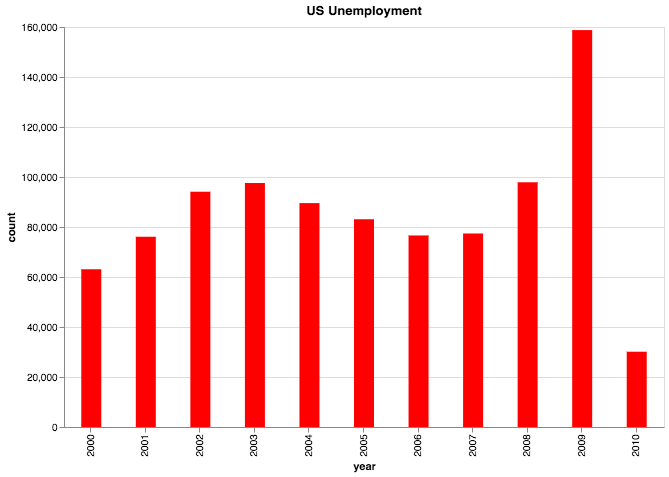

In [16]:
alt.Chart(year_data, height=400, width=600) \
   .mark_bar(color='red', size=20) \
   .encode(x='year:O', 
           y='count:Q') \
   .properties(title='US Unemployment')

In [17]:
series_data = unemployment_data.loc[unemployment_data['year'] == 2009]

series_data = series_data.groupby('series', as_index=False)['count'].sum()

series_data

,series,count
0,Agriculture,2394
1,Business services,18271
2,Construction,21245
3,Education and Health,13202
4,Finance,7180
5,Government,9586
6,Information,3531
7,Leisure and hospitality,18514
8,Manufacturing,22676
9,Mining and Extraction,1083


* Let's see according to the year 2009 which series has highest unemployment. So Manufacturing has more umployment in us, Whole sale-retal, construction series also have more unemployment

* Also in Mining and extraction has least number of unemployment

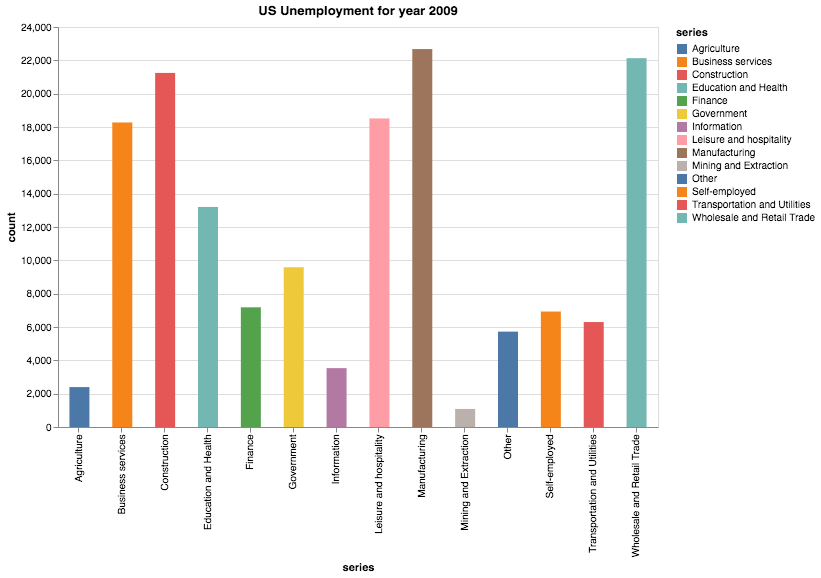

In [18]:
alt.Chart(series_data, height=400, width=600) \
   .mark_bar(size=20) \
   .encode(x='series', 
           y='count', 
           color='series') \
   .properties(title='US Unemployment for year 2009')